Feature weight in Random Forest algorithm


LogisticRegression
Accuracy Score : 0.7804878048780488
Precision Score : 0.6224489795918368
Recall Score : 0.6354166666666666
F1 Score : 0.6288659793814433

RandomForest
Accuracy Score : 0.7835365853658537
Precision Score : 0.6470588235294118
Recall Score : 0.5729166666666666
F1 Score : 0.6077348066298343

GradientBoosting
Accuracy Score : 0.7408536585365854
Precision Score : 0.8235294117647058
Recall Score : 0.14583333333333334
F1 Score : 0.24778761061946902

SVM
Accuracy Score : 0.75
Precision Score : 0.5603448275862069
Recall Score : 0.6770833333333334
F1 Score : 0.6132075471698112

LogisticRegression
Accuracy Score : 0.7804878048780488
Precision Score : 0.6111111111111112
Recall Score : 0.6875
F1 Score : 0.6470588235294118

RandomForest
Accuracy Score : 0.75
Precision Score : 0.5583333333333333
Recall Score : 0.6979166666666666
F1 Score : 0.6203703703703703

GradientBoosting
Accuracy Score : 0.7926829268292683
Precision Score : 0.6891891891891891
Recall Score : 0.53125
F1 Score : 

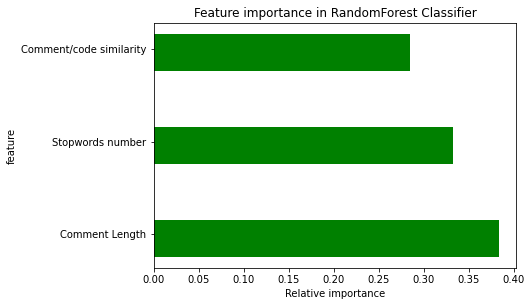

<Figure size 360x360 with 0 Axes>

In [1]:
from models.model_exec import ModelExec
import numpy as np
import matplotlib.pyplot as plt

model_exec = ModelExec()
model = model_exec.execute_model('RandomForest')
model = model.get_model()

def get_plot_weight(col):
    y = model.feature_importances_
    # plot
    fig, ax = plt.subplots()
    width = 0.4  # the width of the bars
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color="green")
    ax.set_yticks(ind + width / 10)
    ax.set_yticklabels(col, minor=False)

    plt.title("Feature importance in RandomForest Classifier")
    plt.xlabel("Relative importance")
    plt.ylabel("feature")
    plt.figure(figsize=(5, 5))
    fig.set_size_inches(6.5, 4.5, forward=True)

get_plot_weight(["Comment Length", "Stopwords number", "Comment/code similarity"])

Feature weight in Random Forest algorithm with comments

In [ ]:
model_exec = ModelExec(include_comments=True)
model = model_exec.execute_model('RandomForest')
model = model.get_model
get_plot_weight(["Comment Length", "Stopwords number", "Comment/code similarity", "Comments"])


Get decision trees in Random Forest algorithm

In [ ]:
estimator = model.estimators_[5]
from sklearn.tree import export_graphviz

export_graphviz(estimator,
                out_file='tree.dot',
                feature_names = ["Comment Length", "Stopwords number", "Comment/code similarity"],
                class_names = ['non-information: yes', 'non-information: no'],
                rounded = True, proportion = False,
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image

Image(filename = 'tree.png')